Je kan een externe variabele gebruiken voor de CERN dataset, die je zelf genereert. noem hem s, de auxiliary variable, die gecorreleerd is aan één variabele, bijv. de waarde van een feature+ruis. kies een variabele die veel signaal heeft, zodat het daadwerkelijk impact heeft

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from matplotlib.pyplot import figure
from time import time

# Import data

In [2]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [3]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/Data/dielectron_classification.csv"

df= read_file(url)

In [35]:
df=pd.read_csv('CERN_testing_set_50_300.csv')
#df = pd.read_csv('CERN_sampled_rf_0.1_dis_004_000_700.csv')

# Prep data

In [36]:
df['s1']=df['pz1']
df['s2']=df['pz2']

# create sample and pool, the sample has size 700
sample=df[df['in_biased_sample']==1]
pool=df[df['in_biased_sample']==0]

X=df.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
y=df.M>21.3
X_pool=pool.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
X_sample = sample.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
y_pool=pool.M>21.3
y_sample=sample.M>21.3
    


In [49]:
X=df.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
y=df.M>21.3
X_pool=pool.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
X_sample = sample.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
y_pool=pool.M>21.3
y_sample=sample.M>21.3

# Train classifier

In [4]:
#split data
y=df.M>21.3
#additional to dropping the endpoints we also drop the run and event numbers, because those aren't predictors
X=df.drop(columns=['M>21.3','M','Run','Event'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#train rf
rf = RandomForestClassifier()
t0 = time()
rf.fit(X_train, y_train)
print ('training time: ', round(time()-t0, 3), 's')

#calculate accuracy
t1=time()
pred_rf = rf.predict(X_test)
print ('predicting time: ', round(time()-t1, 3), 's')
print("Accuracy:",metrics.accuracy_score(y_test, pred_rf))

training time:  20.361 s
predicting time:  0.446 s
Accuracy: 0.9597


In [39]:
#train classifier on sample
rf = RandomForestClassifier()
t0 = time()
rf.fit(X_sample, y_sample)
print ('training time: ', round(time()-t0, 3), 's')

training time:  0.116 s


In [40]:
#accuracy on X (whole set)
t1=time()
pred_rf = rf.predict(X)
print ('predicting time: ', round(time()-t1, 3), 's')
print("Accuracy:",metrics.accuracy_score(y, pred_rf))

predicting time:  0.014 s
Accuracy: 0.72


In [50]:
#train classifier on sample
rf = RandomForestClassifier()
t0 = time()
rf.fit(X_sample, y_sample)
print ('training time: ', round(time()-t0, 3), 's')

training time:  0.085 s


In [51]:
#accuracy on X (whole set)
t1=time()
pred_rf = rf.predict(X)
print ('predicting time: ', round(time()-t1, 3), 's')
print("Accuracy:",metrics.accuracy_score(y, pred_rf))

predicting time:  0.01 s
Accuracy: 0.5142857142857142


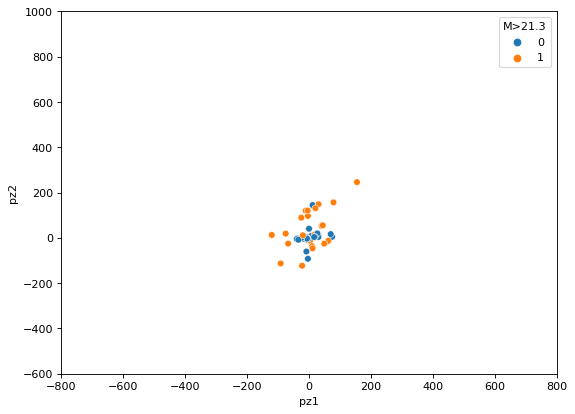

In [37]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=sample, x='pz1', y='pz2', hue=df['M>21.3'] )
plt.xlim([ -800,800])
plt.ylim([-600, 1000])
ax = plt.gca()


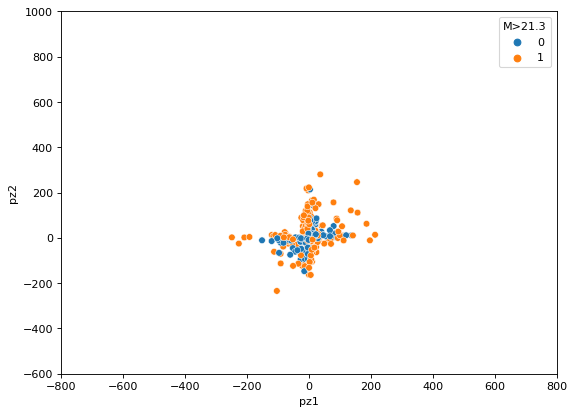

In [38]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=df, x='pz1', y='pz2', hue=df['M>21.3'] )
plt.xlim([ -800,800])
plt.ylim([-600, 1000])
ax = plt.gca()


In [5]:
rf.feature_importances_

array([0.07998014, 0.03255106, 0.03344658, 0.11700008, 0.10174179,
       0.109527  , 0.02331551, 0.00196543, 0.10026766, 0.03131217,
       0.03148111, 0.12423561, 0.08091299, 0.10755094, 0.02277101,
       0.00194092])

In [ ]:
Op basis van de feature importances, kiezen we pz1 als feature om de auxiliary variable s aan laten te correleren. we definiëren s als volgt:


<ipython-input-31-7cb19422f63d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['s1']=sample['pz1']


In [42]:
#add noise to s
for i in range(sample.shape[0]):
    sample['s1'].at[i]=sample['s1'][i]+np.random.normal(0,20)
    
#add noise to s
for i in range(sample.shape[0]):
    sample['s2'].at[i]=sample['s2'][i]+np.random.normal(0,20)


In [13]:
type(s)

pandas.core.series.Series

In [7]:
X['s']=s

In [15]:
X['s'].at[0]=0

In [34]:
X['s'].head()

0    -53.422627
1    125.994569
2    -29.589621
3     48.112197
4    -80.323700
Name: s, dtype: float64

In [22]:
X['pz1'].head()

0   -25.900835
1    77.955734
2    21.677692
3    73.344837
4   -91.589995
Name: pz1, dtype: float64

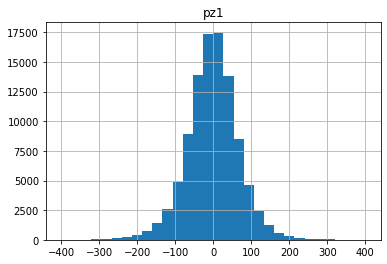

In [30]:
X.hist('pz1', bins=30, range=(-400, 400))
plt.show()

## Visualize

In [44]:
sample.loc[(sample['s1'] < 30) & (sample['s1']>-30) & (sample['s2'] < 30) & (sample['s2']>-30)].shape[0]

18

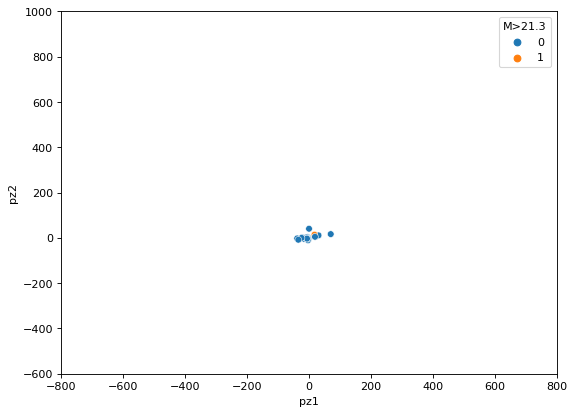

In [46]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=sample[(sample['s1'] < 30) & (sample['s1']>-30) & (sample['s2'] < 30) & (sample['s2']>-30)], x='pz1', y='pz2', hue=df['M>21.3'] )
plt.xlim([ -800,800])
plt.ylim([-600, 1000])
ax = plt.gca()



In [48]:
sample=sample[(sample['s1'] < 30) & (sample['s1']>-30) & (sample['s2'] < 30) & (sample['s2']>-30)]

In [31]:
X.loc[(X['s'] < 30) & (X['s']>-30)].shape[0]

28373

In [27]:
X[(X['s'] < 50) & (X['s']>-50)].head()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,s
0,58.71410,-7.311320,10.531000,-25.900835,12.82020,-2.202670,2.177660,1,11.28360,-1.03234,-1.880660,-11.07780,2.14537,-2.344030,-2.072810,-1,-45.802876
6,84.50580,8.824360,10.578900,39.707415,13.77610,2.500320,0.875576,1,12.67840,-1.13446,-3.209390,-12.21280,3.40400,-1.989560,-1.910570,-1,11.077843
15,52.46480,12.719800,2.848960,-23.813859,13.03490,-2.069860,0.220342,1,5.07997,2.07938,-0.074933,-4.63429,2.08073,-1.540880,-0.036021,1,-18.443401
17,9.34051,-2.015710,0.520275,-12.630504,2.08177,-2.181630,2.889000,1,19.43260,-11.80940,-9.276870,-12.33300,15.01740,-0.749175,-2.475720,-1,-42.716851
18,3.53688,0.406444,-2.292390,8.566722,2.32814,-0.979389,-1.395320,-1,106.70700,13.29020,-30.230100,-101.46800,33.02260,-1.841190,-1.156600,-1,12.768863


In [25]:
X.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,s
0,58.71410,-7.31132,10.531000,-25.900835,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,-45.802876
1,6.61188,-4.15213,-0.579855,77.955734,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,90.844695
2,25.54190,-11.48090,2.041680,21.677692,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,80.775809
3,65.39590,7.51214,11.887100,73.344837,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,59.473365
4,61.45040,2.95284,-14.622700,-91.589995,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,-139.249678


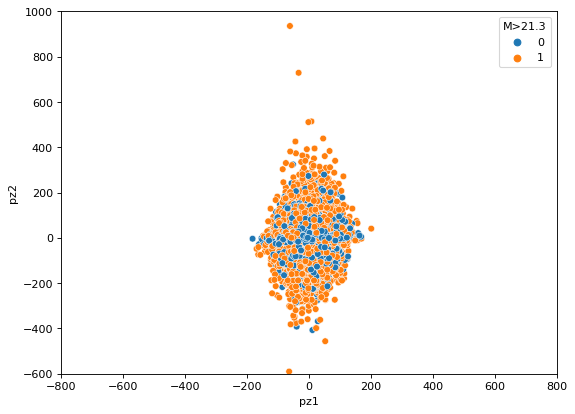

In [35]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=X[(X['s'] < 40) & (X['s']>-40)], x='pz1', y='pz2', hue=df['M>21.3'] )
plt.xlim([ -800,800])
plt.ylim([-600, 1000])
ax = plt.gca()


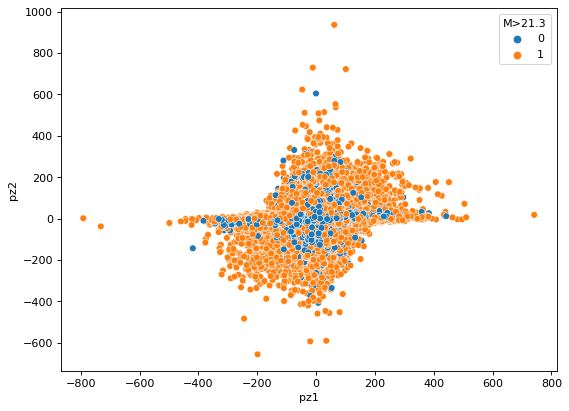

In [39]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=X, x='pz1', y='pz2', hue=df['M>21.3'] )
ax = plt.gca()

In [36]:
X['s2']=X['pz2']
#add noise to s2
for i in range(X['s2'].shape[0]):
    X['s2'].at[i]=X['s2'][i]+np.random.normal(0,50)

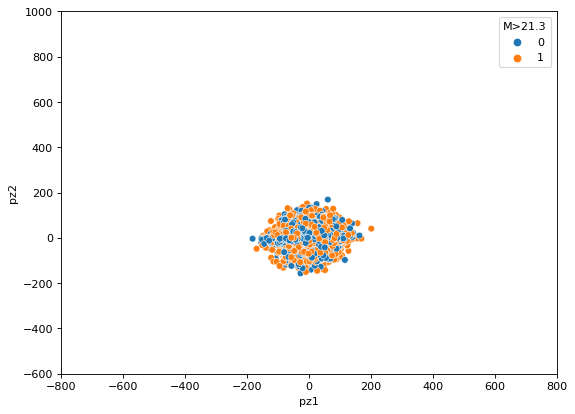

In [37]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=X[(X['s'] < 40) & (X['s']>-40) & (X['s2']<40) & (X['s2']>-40)], x='pz1', y='pz2', hue=df['M>21.3'] )
plt.xlim([ -800,800])
plt.ylim([-600, 1000])
ax = plt.gca()